In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True)

# Monte Carlo Approximation of $\pi$

In this notebook, we will make a Monte Carlo Approximation of $\pi$ using the random point method. The main program used for this approximation includes two functions: 

1) A random point generator that generates 2D points in the xy-plane;
2) A point counter that determines whether generated points falls inside the circle.

First, the point generator. Let's generate just one point, for now.

In [23]:
def generate_point():
    """ Generate a random point within the xy-plane.
    
    Returns:
    --------
    x (numpy.float): 
    the x-coordinates of the point, sampled in uniform distribution.

    y (numpy.float):
    the y-coordinates of the point, sampled in uniform distribution.
    """
    x = np.random.uniform(-1., 1.)
    y = np.random.uniform(-1., 1.)
    return x, y

This function is plotted using the Matplotlib scatter plots.

In [28]:
# Test the generate_point() function.
x, y = generate_point()
x, y

(-0.14498918179316878, 0.7805660411195046)

(-1.0, 1.0)

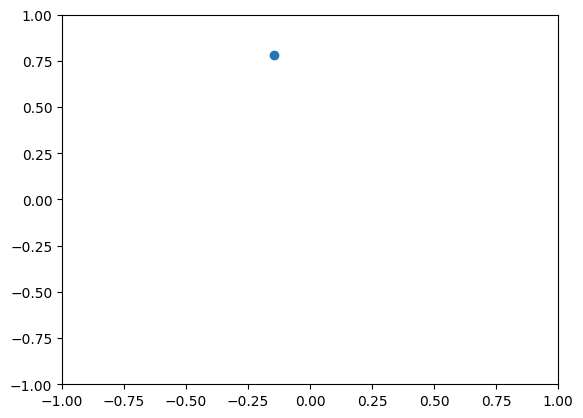

In [29]:
# Plot the point with Matplotlib.
plt.scatter(x, y)
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)

Now we generate multiple points.

In [37]:
def generate_multiple_points(count=100):
    """ Generate multiple random point within the xy-plane.

    Parameters:
    -----------
    count(int):
    the number of points to generate.
    
    Returns:
    --------
    x (np.ndarray): 
    the x-coordinates of the point, sampled in uniform distribution.

    y (np.ndarray):
    the y-coordinates of the point, sampled in uniform distribution.
    """
    x = np.random.uniform(-1., 1., size=count)
    y = np.random.uniform(-1., 1., size=count)
    return x, y

In [87]:
point_count = 100000
x, y = generate_multiple_points(point_count)
x, y

(array([-0.91544324,  0.06044236, -0.19867633, ...,  0.63165577,
        -0.10111909,  0.30572132]),
 array([-0.48960676,  0.35450615, -0.24458851, ..., -0.4662398 ,
        -0.6217004 ,  0.72512356]))

This time we plot it using Seaborn.

<Axes: xlabel='x', ylabel='y'>

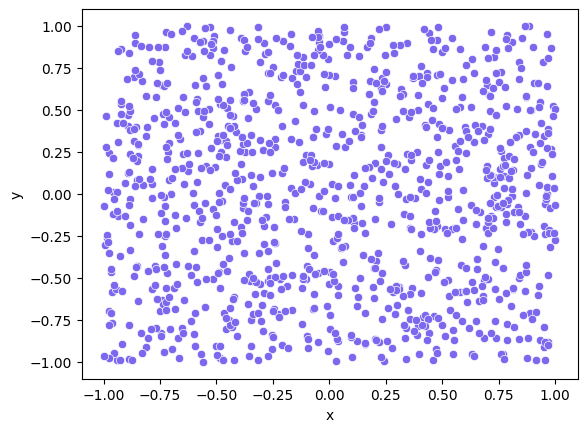

In [41]:
import pandas as pd

df = pd.DataFrame({"x": x, "y": y})
sns.scatterplot(df, x="x", y="y", color="mediumslateblue")

Now we have the points to generate! Let's approximate the value of $\pi$!

In [90]:
def approximate_pi(x, y):
    """ Approximate the value of pi given sample points.

    Parameters:
    -----------
    x (np.ndarray): 
    the x-coordinates of the point, sampled in uniform distribution.

    y (np.ndarray):
    the y-coordinates of the point, sampled in uniform distribution.
    
    Returns:
    --------
    The approximated value of pi!
    """

    # Compute Euclidean distance to origin for each point.
    p = x*x + y*y

    # Output the approximated value of pi (# points within circle / # total points * 4)
    return p[p<=1].shape[0] / p.shape[0] * 4

In [88]:
pi_approx = approximate_pi(x, y)
print(pi_approx)

3.14176


Great! at 10000 sampled points, the value is already pretty close. 

Now we are going to check if the approximation converges to the <code>np.pi</code> ground truth as sample size increases. We are going to use all previously written function for this, and run repeated simulation of approximation to give us the error curve. 

Note: this algorithm is not very efficient. It is probably a good idea to ensure repeatable randomness by using an RNG or just use one set of points for observing the evolution of error over point increments. But here we are interested in the relationship between point count and error, so all of these computational factors do not matter much.

In [104]:
def pi_approximation_error(count=100):
    """ Generate error function for pi approximation per point increment.

    Parameters:
    -----------
    count (int): 
    the number of points for approximation. Here, it also means the number of approximation runs.
    
    Returns:
    --------
    err (np.ndarray)
    The absolute error function for approximating pi.
    """

    # Using np.pi as ground truth
    true_pi = np.pi 

    # Initialize the error function as np.array
    err = np.zeros(count)

    # Compute error for each point increment
    for c in range(count):
        x, y = generate_multiple_points(c + 1)
        approx_pi = approximate_pi(x, y)

        # Computing the absolute error
        err[c] = np.abs(approx_pi - true_pi)
    
    return err

In [106]:
err = pi_approximation_error(100000)

Text(0, 0.5, 'error')

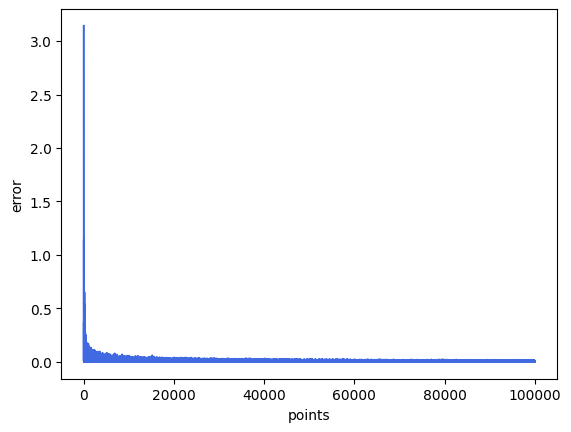

In [107]:
sns.lineplot(err, color="royalblue")
plt.xlabel("points")
plt.ylabel("error")

That's it! As we can see, the approximation error converges to 0 with point increments.